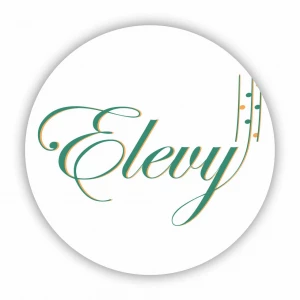

## **Analysing Twitter Users' Tweets on the implementation of Elevy**

#### *This notebook is by Nana Amina Abubakar*



This is a Data Analysis Project using Python(Jupyter Notebook) and PowerBi. In October 2021 after its announcement during the midyear review and final implementation in May 2022, several economic changes have occured in the country. Most sentiments were shared across all social media platforms especially on Twitter. I felt this was the ideal scenario for my first project using Jupyter Notebook for data scraping and Powerbi for further visualization. I had to retrieve tweets from 01/10/2021 to 31/07/2022 and obtain insights into how twitter users felt about the entire Elevy situation. This notebook makes use of several Python libraries like Pandas (for Data Cleaning/Manipulation), snscrape (for Tweets Mining) and Geopy for location geocoding.


---

### Content

---

1. [Import Libraries](#1.-Import-Libraries)

2. [Tweets Mining](#2.-Tweets-Mining)

3. [Data Cleaning](#3.-Data-Cleaning)

4. [Location Geocoding](#4.-Location-Geocoding)

5. [Closing Remarks and Links](#5.-Closing-Remarks)




---

### 1. Import Libraries

---

I imported all the libraries to be used in this notebook. It is usually advisable to do this at the beginning of every project for a better final outlook and presentation to the target audience.

In [1]:
# Tweet mining Toolkit
# pip install snscrape
import snscrape.modules.twitter as sntwitter # for mining the desired tweets from twitter

# Pandas DataFrame Toolkit
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import csv # to read and write csv files
import re # In-built regular expressions library
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import requests # to send HTTP requests

# Set the limits for Pandas Dataframe display to avoid potential system freeze
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 15)
pd.set_option('display.max_colwidth', 40)

# Location GeoCoding Toolkit
# pip install Geopy
from geopy.geocoders import Nominatim


---

### 2. Tweets Mining

---

I mined the data i required for the data analysis using the snscrape library and loaded it into the notebook.

In [2]:
query = "(elevy) until:2022-07-31 since:2021-10-01 "
tweets = []
limit = 1000000

for tweet in sntwitter.TwitterHashtagScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
            tweets.append([tweet.date, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount, tweet.quoteCount, tweet.replyCount])
            
df = pd.DataFrame(tweets, columns=['Date','TweetURL', 'User', 'Source', 'Location', 'Tweet', 'Likes_Count', 'Retweet_Count','Quote_Count', 'Reply_Count'])


df.to_csv('ElevyTweets.csv')

In [3]:
df=pd.read_csv('ElevyTweets.csv')

In [4]:
df.head()

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,0,2022-07-30 23:47:18+00:00,https://twitter.com/Astreetjournal/s...,Astreetjournal,Twitter for Android,"Lagos, Nigeria",GHANA: Hi it seems Ghana's Vice Pres...,1,0,0,0
1,1,2022-07-30 22:29:38+00:00,https://twitter.com/iamStan09/status...,iamStan09,Twitter for Android,NaN,You cancel sim cards.. then you lose...,1,0,0,0
2,2,2022-07-30 22:03:39+00:00,https://twitter.com/endurance_k/stat...,endurance_k,Twitter for Android,Ghana,Government: We will not cancel e-lev...,2,1,0,2
3,3,2022-07-30 19:21:33+00:00,https://twitter.com/elevy_L/status/1...,elevy_L,Twitter for iPhone,Wall Street,@kingrachelgreen Puc,1,0,0,0
4,4,2022-07-30 19:20:58+00:00,https://twitter.com/kingrachelgreen/...,kingrachelgreen,Twitter for Android,NaN,@elevy_L Puc,0,0,0,1


---

### 3. Data Cleaning

---

I cleaned the data frame in this section.Values were checked for NAN values. NAN values were replaced to make the data visualization easier. 

In [5]:
df.shape #Get the number of rows and columns

(17261, 11)

In [6]:
df.isna().any() # Check for "NaN" values

Unnamed: 0       False
Date             False
TweetURL         False
User             False
Source           False
Location          True
Tweet            False
Likes_Count      False
Retweet_Count    False
Quote_Count      False
Reply_Count      False
dtype: bool

In [7]:
df['Location']=df['Location'].fillna('No Location') # Replace "NaN" values with "No Location"

In [8]:
df.isna().any() # Check for "NaN" values

Unnamed: 0       False
Date             False
TweetURL         False
User             False
Source           False
Location         False
Tweet            False
Likes_Count      False
Retweet_Count    False
Quote_Count      False
Reply_Count      False
dtype: bool

In [9]:
df.head() # Check confirm changes have been made

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count
0,0,2022-07-30 23:47:18+00:00,https://twitter.com/Astreetjournal/s...,Astreetjournal,Twitter for Android,"Lagos, Nigeria",GHANA: Hi it seems Ghana's Vice Pres...,1,0,0,0
1,1,2022-07-30 22:29:38+00:00,https://twitter.com/iamStan09/status...,iamStan09,Twitter for Android,No Location,You cancel sim cards.. then you lose...,1,0,0,0
2,2,2022-07-30 22:03:39+00:00,https://twitter.com/endurance_k/stat...,endurance_k,Twitter for Android,Ghana,Government: We will not cancel e-lev...,2,1,0,2
3,3,2022-07-30 19:21:33+00:00,https://twitter.com/elevy_L/status/1...,elevy_L,Twitter for iPhone,Wall Street,@kingrachelgreen Puc,1,0,0,0
4,4,2022-07-30 19:20:58+00:00,https://twitter.com/kingrachelgreen/...,kingrachelgreen,Twitter for Android,No Location,@elevy_L Puc,0,0,0,1


In [10]:
# Concatenate a few column names to create a long string of any given address. This column will be used as a query term for the geoPy API.


df['query'] = df['Location'] # creates variable column inside file called `myAddress and assigns it to seleted address columns


df.iloc[0:5, 8:9] # prints new column with index -first 5 rows only

,Retweet_Count
0,0
1,0
2,1
3,0
4,0


In [11]:
# Remove duplicate addresses, keeping the first instance of the query address. 
# TIP: sort the data for most current address if applicable. 

df.drop_duplicates(subset ='query', keep ='first', inplace = True) #removes duplicate addresses (new concat column) but keep first instance


print("data row x columns is {}\ndata row count is {}".format(df.shape,len(df.index))) # prints some useful info: row length and shape size


df.head() #print first rows as sample

data row x columns is (1999, 12)
data row count is 1999


,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,query
0,0,2022-07-30 23:47:18+00:00,https://twitter.com/Astreetjournal/s...,Astreetjournal,Twitter for Android,"Lagos, Nigeria",GHANA: Hi it seems Ghana's Vice Pres...,1,0,0,0,"Lagos, Nigeria"
1,1,2022-07-30 22:29:38+00:00,https://twitter.com/iamStan09/status...,iamStan09,Twitter for Android,No Location,You cancel sim cards.. then you lose...,1,0,0,0,No Location
2,2,2022-07-30 22:03:39+00:00,https://twitter.com/endurance_k/stat...,endurance_k,Twitter for Android,Ghana,Government: We will not cancel e-lev...,2,1,0,2,Ghana
3,3,2022-07-30 19:21:33+00:00,https://twitter.com/elevy_L/status/1...,elevy_L,Twitter for iPhone,Wall Street,@kingrachelgreen Puc,1,0,0,0,Wall Street
10,10,2022-07-30 15:08:19+00:00,https://twitter.com/jimmyintweet/sta...,jimmyintweet,Twitter Web App,"Accra, Ghana",@hughes_onair They had their way thr...,3,0,0,0,"Accra, Ghana"


---


### 4. Location Geocoding 


---
In my Powerbi dashboard, I wanted to include a map that displays the number of tweets per country. Powerbi will need basic geographic information that it can recognize. I used the Geopy API to return Longitude, Latitude and Country address for each tweet. 

In [12]:
# Geopy returns the latitude, longitude coordinates and specific address. I created 3 columns in my df.

#create 2 new columns to store lat/long - initalise to null
df['location_lat'] = ""
df['location_long'] = ""
df['location_address'] = ""

#print first rows to sample
df.head()

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,query,location_lat,location_long,location_address
0,0,2022-07-30 23:47:18+00:00,https://twitter.com/Astreetjournal/s...,Astreetjournal,Twitter for Android,"Lagos, Nigeria",GHANA: Hi it seems Ghana's Vice Pres...,1,0,0,0,"Lagos, Nigeria",,,
1,1,2022-07-30 22:29:38+00:00,https://twitter.com/iamStan09/status...,iamStan09,Twitter for Android,No Location,You cancel sim cards.. then you lose...,1,0,0,0,No Location,,,
2,2,2022-07-30 22:03:39+00:00,https://twitter.com/endurance_k/stat...,endurance_k,Twitter for Android,Ghana,Government: We will not cancel e-lev...,2,1,0,2,Ghana,,,
3,3,2022-07-30 19:21:33+00:00,https://twitter.com/elevy_L/status/1...,elevy_L,Twitter for iPhone,Wall Street,@kingrachelgreen Puc,1,0,0,0,Wall Street,,,
10,10,2022-07-30 15:08:19+00:00,https://twitter.com/jimmyintweet/sta...,jimmyintweet,Twitter Web App,"Accra, Ghana",@hughes_onair They had their way thr...,3,0,0,0,"Accra, Ghana",,,


In [13]:
# using Geopy to fetch geocode data

'''
**Get Lat/Long Data with GeoPy**
---------------------
The code below calls a geopy API using a concatenated column of address values. I used this column as a query key 
to pull back cooresponding lat/long coordinates.
'''

geolocator = Nominatim(user_agent="myApp")

for i in df.index:
    try:
        #tries fetch address from geopy
        location = geolocator.geocode(df['query'][i])
        
        #append lat/long to column using dataframe location
        df.loc[i,'location_lat'] = location.latitude
        df.loc[i,'location_long'] = location.longitude
        df.loc[i,'location_address'] = location.address
    except:
        #catches exception for the case where no value is returned
        #appends null value to column
        df.loc[i,'location_lat'] = float('NAN')
        df.loc[i,'location_long'] = float('NAN')
        df.loc[i,'location_address'] = float('NAN')


### Preview the resulting dataframe in preparation for export to PowerBi

In [14]:
df.head() # Check dataframe 

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,query,location_lat,location_long,location_address
0,0,2022-07-30 23:47:18+00:00,https://twitter.com/Astreetjournal/s...,Astreetjournal,Twitter for Android,"Lagos, Nigeria",GHANA: Hi it seems Ghana's Vice Pres...,1,0,0,0,"Lagos, Nigeria",6.455057,3.394179,"Lagos, Lagos Island, Lagos, 100242, ..."
1,1,2022-07-30 22:29:38+00:00,https://twitter.com/iamStan09/status...,iamStan09,Twitter for Android,No Location,You cancel sim cards.. then you lose...,1,0,0,0,No Location,57.15777,-170.229392,U.S. Coast Guard - Forward Operating...
2,2,2022-07-30 22:03:39+00:00,https://twitter.com/endurance_k/stat...,endurance_k,Twitter for Android,Ghana,Government: We will not cancel e-lev...,2,1,0,2,Ghana,8.030028,-1.080027,Ghana
3,3,2022-07-30 19:21:33+00:00,https://twitter.com/elevy_L/status/1...,elevy_L,Twitter for iPhone,Wall Street,@kingrachelgreen Puc,1,0,0,0,Wall Street,40.706019,-74.008831,"Wall Street, Financial District, Man..."
10,10,2022-07-30 15:08:19+00:00,https://twitter.com/jimmyintweet/sta...,jimmyintweet,Twitter Web App,"Accra, Ghana",@hughes_onair They had their way thr...,3,0,0,0,"Accra, Ghana",5.55711,-0.201238,"Accra, Korle-Klottey Municipal Distr..."


In [15]:
# Remove Unnecessary columns. I used copy here because I wanted a dataframe that does not impact my original dataframe

PowerBi_df = df.drop((['query','location_address']), axis=1).copy(deep=True)

In [16]:
PowerBi_df.head() # Check dataframe 

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Count,Retweet_Count,Quote_Count,Reply_Count,location_lat,location_long
0,0,2022-07-30 23:47:18+00:00,https://twitter.com/Astreetjournal/s...,Astreetjournal,Twitter for Android,"Lagos, Nigeria",GHANA: Hi it seems Ghana's Vice Pres...,1,0,0,0,6.455057,3.394179
1,1,2022-07-30 22:29:38+00:00,https://twitter.com/iamStan09/status...,iamStan09,Twitter for Android,No Location,You cancel sim cards.. then you lose...,1,0,0,0,57.15777,-170.229392
2,2,2022-07-30 22:03:39+00:00,https://twitter.com/endurance_k/stat...,endurance_k,Twitter for Android,Ghana,Government: We will not cancel e-lev...,2,1,0,2,8.030028,-1.080027
3,3,2022-07-30 19:21:33+00:00,https://twitter.com/elevy_L/status/1...,elevy_L,Twitter for iPhone,Wall Street,@kingrachelgreen Puc,1,0,0,0,40.706019,-74.008831
10,10,2022-07-30 15:08:19+00:00,https://twitter.com/jimmyintweet/sta...,jimmyintweet,Twitter Web App,"Accra, Ghana",@hughes_onair They had their way thr...,3,0,0,0,5.55711,-0.201238


In [17]:
# Save file. 

PowerBi_df.to_csv('PowerBi_ElevyTweets.csv')

---


### 5. Closing Remarks


---

## THANK YOU FOR TAKING TIME TO STUDY MY NOTEBOOK. I HOPE YOU GOT SOME INSIGHTS.

## You can use the links below to view my other pages

1. [Medium Page](https://medium.com/@abubakarmina14)

2. [LinkedIn Page](https://www.linkedin.com/in/nana-amina-abubakar-9454b8115/)
